17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Sample Decoded Review:
 <START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that p

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - binary_accuracy: 0.7123 - loss: 0.5989 - val_binary_accuracy: 0.8223 - val_loss: 0.4333
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - binary_accuracy: 0.8829 - loss: 0.3532 - val_binary_accuracy: 0.8842 - val_loss: 0.3151
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - binary_accuracy: 0.9170 - loss: 0.2558 - val_binary_accuracy: 0.8904 - val_loss: 0.2832
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - binary_accuracy: 0.9360 - loss: 0.1983 - val_binary_accuracy: 0.8893 - val_loss: 0.2759
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - binary_accuracy: 0.9464 - loss: 0.1666 - val_binary_accuracy: 0.8710 - val_loss: 0.3290
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - binary_accuracy: 0.9555 - loss: 0.1424 - val_binary_accuracy: 0.8857 - val_loss: 0.2871
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - binary_accuracy: 0.9629 - loss: 0.1217 - val_binary_accuracy: 0.8860 - val_loss: 0.2895
Epoch 8/20
30

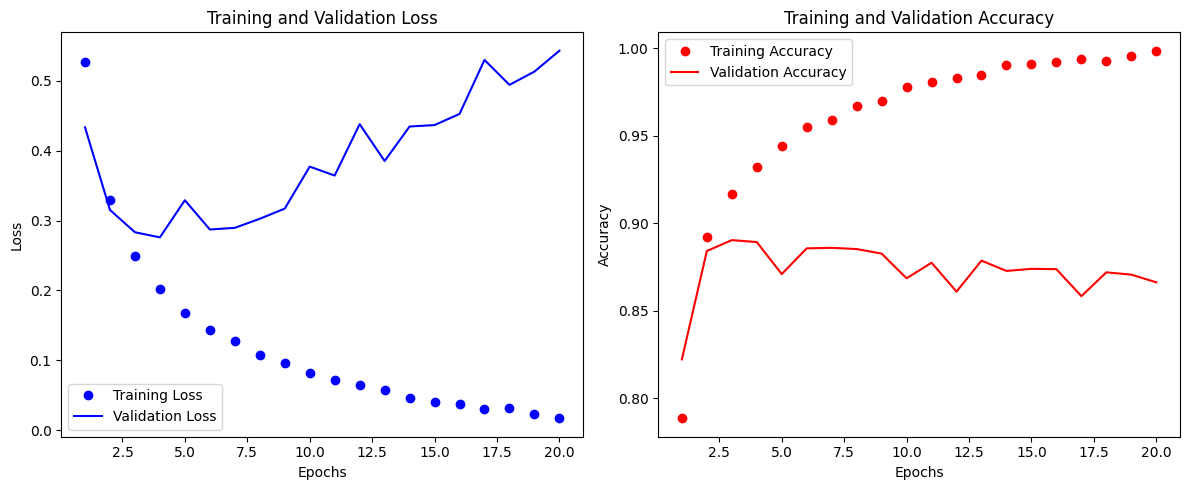

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - binary_accuracy: 0.8520 - loss: 0.6068

Test Loss: 0.5943, Test Accuracy: 0.8553
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Mean Absolute Error on Test Set: 0.1447


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras import models, layers, optimizers, losses, metrics
from sklearn.metrics import mean_absolute_error

# 1. Load the IMDB dataset
# Keep only the top 10,000 most frequent words
NUM_WORDS = 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=NUM_WORDS)

# 2. Decode a sample review (optional)
word_index = imdb.get_word_index()
reverse_word_index = {value + 3: key for key, value in word_index.items()}
reverse_word_index[0] = "<PAD>"
reverse_word_index[1] = "<START>"
reverse_word_index[2] = "<UNK>"

decoded_review = ' '.join([reverse_word_index.get(i, '?') for i in train_data[0]])
print("Sample Decoded Review:\n", decoded_review)

# 3. Vectorize input data
def vectorize_sequences(sequences, dimension=NUM_WORDS):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# 4. Prepare validation set
X_val = X_train[:10000]
partial_X_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# 5. Build the model
model = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# 6. Compile the model
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss=losses.binary_crossentropy,
    metrics=[metrics.binary_accuracy]
)

# 7. Train the model
history = model.fit(
    partial_X_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(X_val, y_val)
)

# 8. Plot training and validation loss
history_dict = history.history
epochs = range(1, len(history_dict['loss']) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, history_dict['loss'], 'bo', label='Training Loss')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 9. Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, history_dict['binary_accuracy'], 'ro', label='Training Accuracy')
plt.plot(epochs, history_dict['val_binary_accuracy'], 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# 10. Evaluate on test data
results = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {results[0]:.4f}, Test Accuracy: {results[1]:.4f}")

# 11. Predict on test data
predictions = model.predict(X_test)
y_pred = (predictions > 0.5).astype("int").flatten()

# 12. Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"\nMean Absolute Error on Test Set: {mae:.4f}")
